<a href="https://colab.research.google.com/github/Sanjivkumar100/Spam_Email_Classifier/blob/main/SpamEmailDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification?utm_source=chatgpt.com')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjivkagg
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification


100%|██████████| 107M/107M [00:00<00:00, 1.19GB/s]

In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

def cleantext(text):
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lem.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


In [ ]:
import pandas as pd
email= pd.read_csv('/content/drive/MyDrive/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv')
email.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [ ]:
email=email[['text','label']]
email.head()

,text,label
0,viiiiiiagraaaa\nonly for the ones that want to...,Spam
1,got ice thought look az original message ice o...,Ham
2,yo ur wom an ne eds an escapenumber in ch ma n...,Spam
3,start increasing your odds of success & live s...,Spam
4,author jra date escapenumber escapenumber esca...,Ham


In [ ]:
email.isnull().sum()

,0
text,2
label,0


In [ ]:
email.dropna(inplace=True)

In [ ]:
email.shape

(193850, 2)

In [ ]:
email['text']=email['text'].apply(cleantext)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
x=email['text']
y=email['label']
le=LabelEncoder()
y=le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words=10000
max_len=200

tokenizer=Tokenizer(num_words=max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

x_train_pad=pad_sequences(x_train_seq,maxlen=max_len)
x_test_pad=pad_sequences(x_test_seq,maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min')
model=Sequential([
    Embedding(input_dim=max_words,output_dim=128,input_length=max_len),
    LSTM(128,return_sequences=False),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train_pad,y_train,epochs=20,batch_size= 64,callbacks=early_stop,validation_data=(x_test_pad,y_test))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.9474 - loss: 0.1449 - val_accuracy: 0.9746 - val_loss: 0.0737
Epoch 2/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9839 - loss: 0.0476 - val_accuracy: 0.9843 - val_loss: 0.0497
Epoch 3/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9899 - loss: 0.0315 - val_accuracy: 0.9861 - val_loss: 0.0485
Epoch 4/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9881 - val_loss: 0.0492
Epoch 5/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9885 - val_loss: 0.0440
Epoch 6/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9879 - val_loss: 0.0482
Epoch 7/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9898 - val_loss: 0.0467
Epoch 8/20
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.9974 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259,717 (16.25 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,839,812 (10.83 MB)

In [ ]:
loss,acc=model.evaluate(x_test_pad,y_test)
print(f'Accuracy:{acc}')


1212/1212 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9894 - loss: 0.0558
Accuracy:0.989631175994873


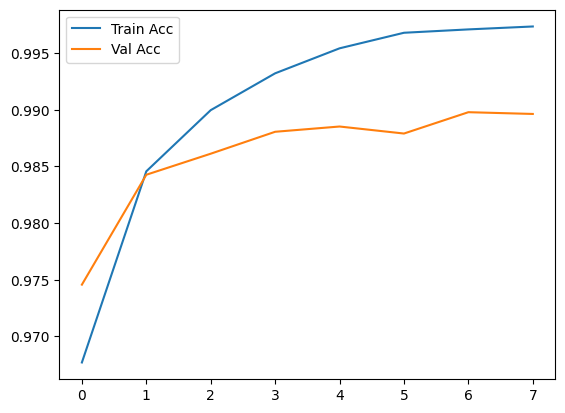

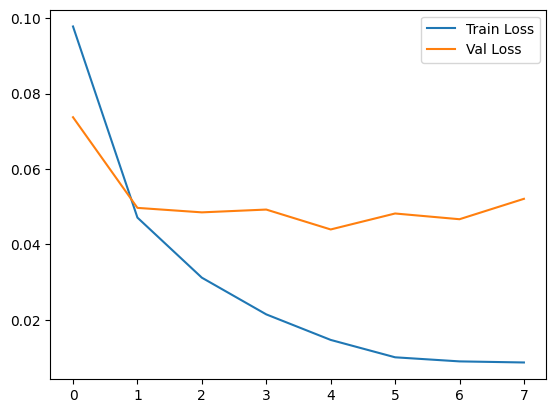

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:
sample_text=[""]
sample_seq=tokenizer.texts_to_sequences(sample_text)
sample_pad=pad_sequences(sample_seq,maxlen=max_len)
prediction=model.predict(sample_pad)
print(f'Prediction:{prediction}')
print("Spam" if prediction[0][0]>0.5 else "Not Spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction:[[0.9997917]]
Spam


In [ ]:
model.save('/content/drive/MyDrive/spam_detection_model.h5')

In [ ]:
import pickle
with open('/content/drive/MyDrive/tokenizer.pkl','wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)